In [33]:
# Import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
import sklearn.utils
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.manifold import TSNE

In [34]:
# Read file/data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/penguins.csv')
print(df)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                 NaN              NaN                NaN          NaN     NaN
4                36.7             19.3              193.0       3450.0  FEMALE
..                ...              ...                ...          ...     ...
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[344 rows x 5 columns]


In [35]:
type(df)
df.shape

(344, 5)

In [36]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [37]:
df.dtypes

,0
culmen_length_mm,float64
culmen_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [39]:
# To identify null values
df.isnull().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [40]:
# Converting null values to mean for numerical features
df.loc[(df['culmen_length_mm'].isnull() == True), 'culmen_length_mm'] = df['culmen_length_mm'].mean()
df.loc[(df['culmen_depth_mm'].isnull() == True), 'culmen_depth_mm'] = df['culmen_depth_mm'].mean()
df.loc[(df['flipper_length_mm'].isnull() == True), 'flipper_length_mm'] = df['flipper_length_mm'].mean()
df.loc[(df['body_mass_g'].isnull() == True), 'body_mass_g'] = df['body_mass_g'].mean()

df.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,9


In [41]:
# Dropping null values
df=df.dropna()
df.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [42]:
# One record is found to have an irrelevant data and negated from showing up
df = df[df['sex'] != '.']

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.986826,5.461540,32.1,39.5,44.45,48.575,59.6
culmen_depth_mm,334.0,17.173952,1.973277,13.1,15.6,17.30,18.700,21.5
flipper_length_mm,334.0,214.347305,263.648447,-132.0,190.0,197.00,213.000,5000.0
body_mass_g,334.0,4207.185629,804.009294,2700.0,3550.0,4050.00,4768.750,6300.0


In [44]:
df.shape

(334, 5)

In [45]:
# Checking for duplicate records.
df.duplicated().sum()

0

In [46]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


Text(0.5, 1.0, 'Count of Penguins by Gender')

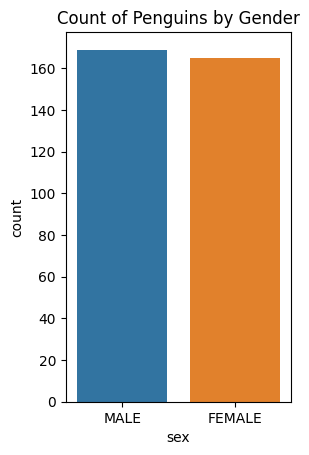

In [47]:
# Count of penguins based on gender
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df, hue="sex")
plt.title('Count of Penguins by Gender')

<Axes: xlabel='sex', ylabel='culmen_depth_mm'>

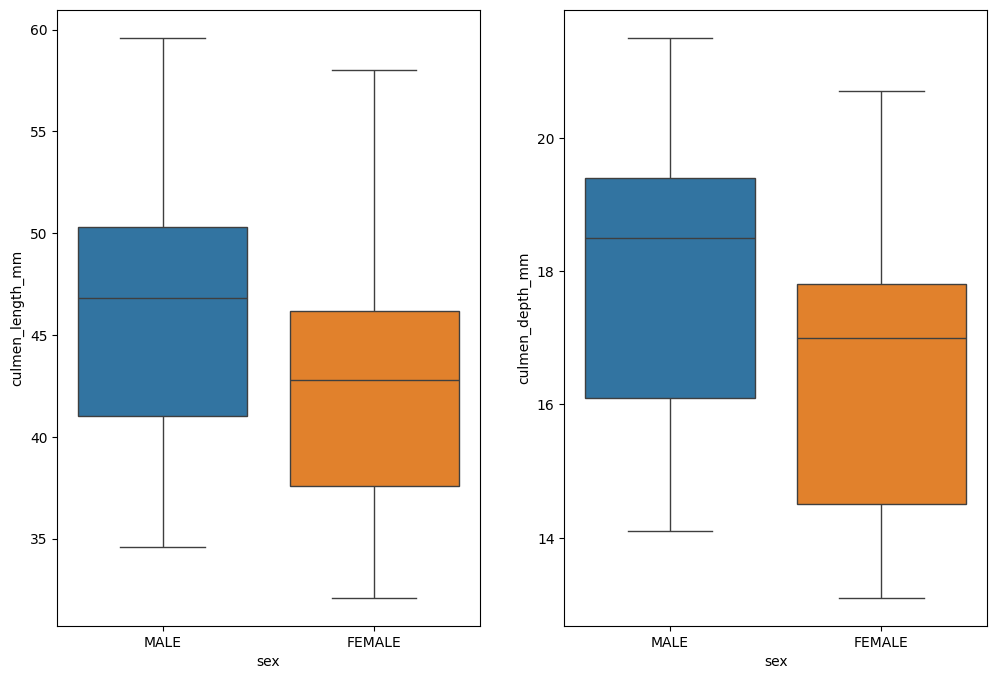

In [48]:
# Boxplot to understand the lenghts and depths

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x="sex", y="culmen_length_mm", data=df, orient='v', ax=axes[0], hue="sex")
sns.boxplot(x="sex", y="culmen_depth_mm", data=df, orient='v', ax=axes[1], hue="sex")

In [49]:
penguins_female = df[df['sex'] == 'FEMALE']
print(penguins_female.shape)
penguins_female.head()

(165, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
6,38.9,17.8,181.0,3625.0,FEMALE
12,41.1,17.6,182.0,3200.0,FEMALE


In [50]:
penguins_male = df[df['sex'] == 'MALE']
print(penguins_male.shape)
penguins_male.head()

(169, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
5,39.3,20.6,190.0,3650.0,MALE
7,39.2,19.6,195.0,4675.0,MALE
9,42.0,20.2,5000.0,4250.0,MALE
13,38.6,21.2,191.0,3800.0,MALE


In [51]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

In [52]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [53]:
penguins_female.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
6,38.9,17.8,181.0,3625.0,FEMALE
12,41.1,17.6,182.0,3200.0,FEMALE


In [54]:
penguins_male.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
5,39.3,20.6,190.0,3650.0,MALE
7,39.2,19.6,195.0,4675.0,MALE
9,42.0,20.2,5000.0,4250.0,MALE
13,38.6,21.2,191.0,3800.0,MALE


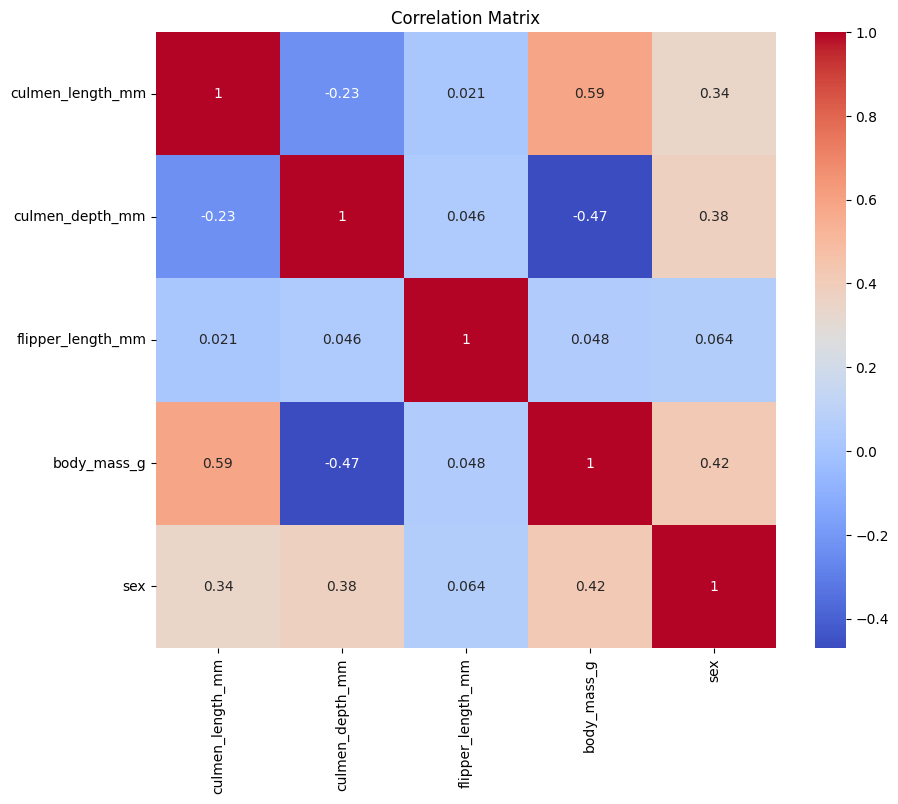

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

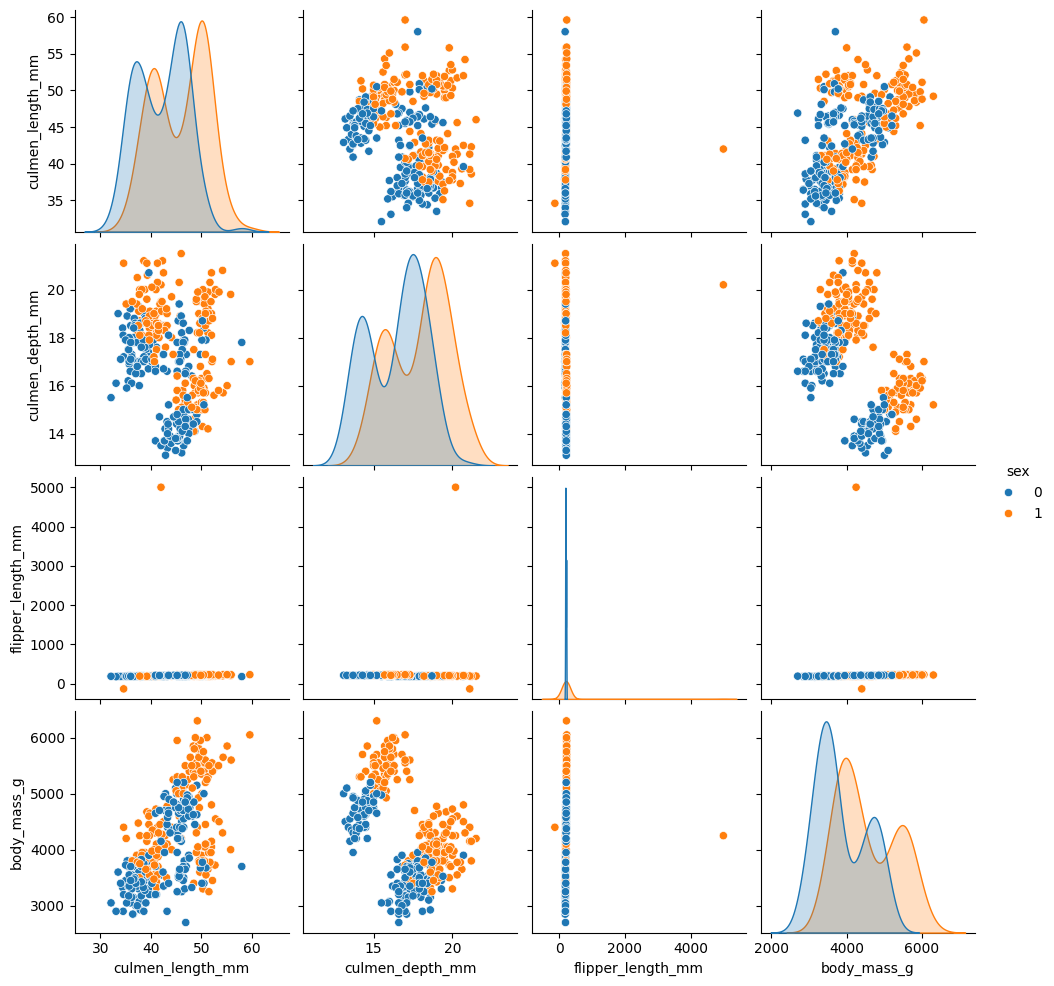

In [56]:
# Pair plot to understand the corelation of each feature
sns.pairplot(df, hue='sex')
plt.show()

In [57]:
Clus_dataset = penguins_female[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
Clus_dataset = np.nan_to_num(Clus_dataset)
Clus_dataset = np.array(Clus_dataset, dtype=np.float64)
Clus_dataset = StandardScaler().fit_transform(Clus_dataset)

db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
penguins_female["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

print(penguins_female[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g', 'Clus_Db']].head())
print('Number of labels: ', set(labels))

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  Clus_Db
1               39.5             17.4              186.0       3800.0        0
2               40.3             18.0              195.0       3250.0        0
4               36.7             19.3              193.0       3450.0        0
6               38.9             17.8              181.0       3625.0        0
12              41.1             17.6              182.0       3200.0       -1
Number of labels:  {0, 1, 2, -1}


<ipython-input-57-2e8e202c4878>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_female["Clus_Db"]=labels


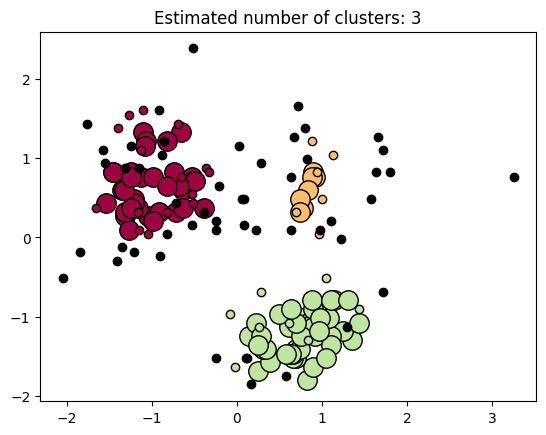

Number of Noise:  51


In [59]:
# DBSCAN Cluster for female penguins

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
        if k == -1:
                col = [0,0,0,1]
        class_member_mask = (labels == k)

        xy = Clus_dataset[class_member_mask & core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = Clus_dataset[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()
n_noise = list(labels).count(-1)
print('Number of Noise: ', n_noise)

In [62]:
for clust_number in set(labels):
    clust_set = penguins_female[penguins_female.Clus_Db == clust_number]
    if clust_number != -1:
        print("====","Cluster {}".format(clust_number), "====")
        print("Average Culmen Length: ", str(round(np.mean(clust_set['culmen_length_mm']))))
        print("Average Culmen Depth: ", str(round(np.mean(clust_set['culmen_depth_mm']))))
        print("Average Flipper Length: ", str(round(np.mean(clust_set['flipper_length_mm']))))
        print("Average Body Mass: ", str(round(np.mean(clust_set['body_mass_g']))))
        print("Count: ", str(np.count_nonzero(clust_set.index)))
        print("--------------------------------------")

==== Cluster 0 ====
Average Culmen Length:  37
Average Culmen Depth:  18
Average Flipper Length:  189
Average Body Mass:  3386
Count:  49
--------------------------------------
==== Cluster 1 ====
Average Culmen Length:  46
Average Culmen Depth:  18
Average Flipper Length:  192
Average Body Mass:  3610
Count:  13
--------------------------------------
==== Cluster 2 ====
Average Culmen Length:  46
Average Culmen Depth:  14
Average Flipper Length:  213
Average Body Mass:  4675
Count:  52
--------------------------------------


In [58]:
Clus_dataset1 = penguins_male[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
Clus_dataset1 = np.nan_to_num(Clus_dataset1)
Clus_dataset1 = np.array(Clus_dataset1, dtype=np.float64)
Clus_dataset1 = StandardScaler().fit_transform(Clus_dataset1)

db1 = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataset1)
core_samples_mask1 = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask1[db.core_sample_indices_] = True
labels1 = db1.labels_
penguins_male["Clus_Db1"]=labels1

realClusterNum1=len(set(labels1)) - (1 if -1 in labels1 else 0)
clusterNum1 = len(set(labels1))

print(penguins_male[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g', 'Clus_Db1']].head())
print('Number of labels: ', set(labels1))

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0               39.1             18.7              181.0       3750.0   
5               39.3             20.6              190.0       3650.0   
7               39.2             19.6              195.0       4675.0   
9               42.0             20.2             5000.0       4250.0   
13              38.6             21.2              191.0       3800.0   

    Clus_Db1  
0          0  
5          0  
7          0  
9         -1  
13         0  
Number of labels:  {0, 1, 2, -1}


<ipython-input-58-caf10c64b14e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_male["Clus_Db1"]=labels1


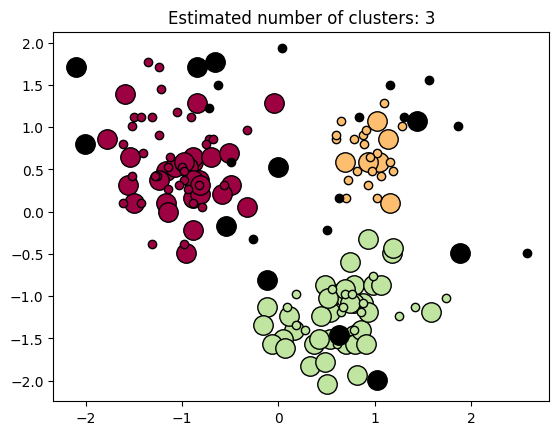

Number of Noise:  24


In [61]:
#DBSCAN Cluster for male penguins

unique_labels1 = set(labels1)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels1))]

for k, col in zip(unique_labels1, colors):
        if k == -1:
                col = [0,0,0,1]
        class_member_mask1 = (labels1 == k)

        xy = Clus_dataset1[class_member_mask1 & core_samples_mask1]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = Clus_dataset1[class_member_mask1 & ~core_samples_mask1]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum1)
plt.show()
n_noise = list(labels1).count(-1)
print('Number of Noise: ', n_noise)

In [64]:
for clust_number1 in set(labels1):
    clust_set1 = penguins_male[penguins_male.Clus_Db1 == clust_number1]
    if clust_number != -1:
        print("====","Cluster {}".format(clust_number1), "====")
        print("Average Culmen Length: ", str(round(np.mean(clust_set1['culmen_length_mm']))))
        print("Average Culmen Depth: ", str(round(np.mean(clust_set1['culmen_depth_mm']))))
        print("Average Flipper Length: ", str(round(np.mean(clust_set1['flipper_length_mm']))))
        print("Average Body Mass: ", str(round(np.mean(clust_set1['body_mass_g']))))
        print("Count: ", str(np.count_nonzero(clust_set1.index)))
        print("--------------------------------------")

==== Cluster 0 ====
Average Culmen Length:  40
Average Culmen Depth:  19
Average Flipper Length:  192
Average Body Mass:  3995
Count:  63
--------------------------------------
==== Cluster 1 ====
Average Culmen Length:  51
Average Culmen Depth:  19
Average Flipper Length:  199
Average Body Mass:  3872
Count:  26
--------------------------------------
==== Cluster 2 ====
Average Culmen Length:  49
Average Culmen Depth:  16
Average Flipper Length:  221
Average Body Mass:  5457
Count:  55
--------------------------------------
==== Cluster -1 ====
Average Culmen Length:  47
Average Culmen Depth:  19
Average Flipper Length:  391
Average Body Mass:  4643
Count:  24
--------------------------------------
